In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle

In [10]:
pkl_base = "result_ap_txt/"

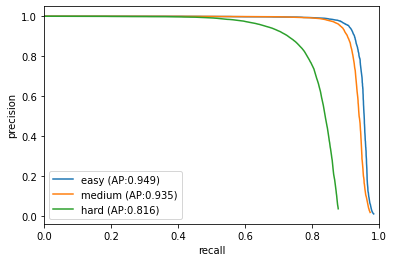

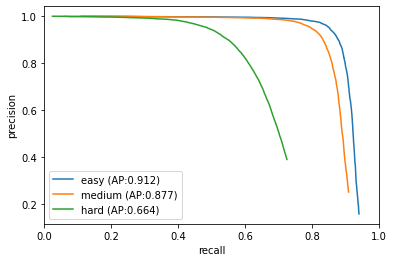

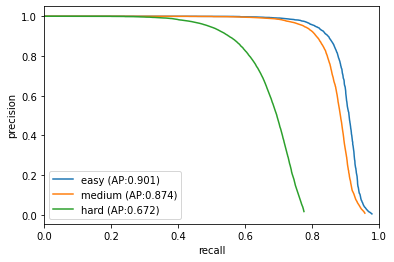

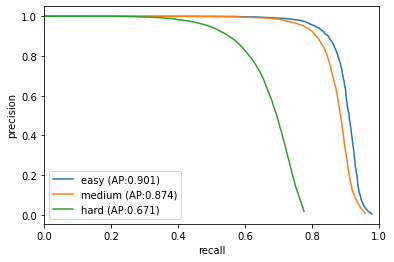

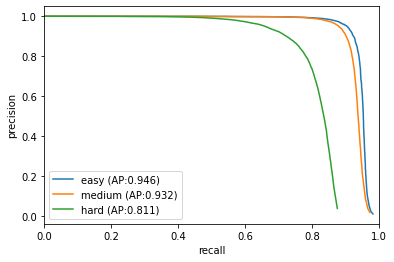

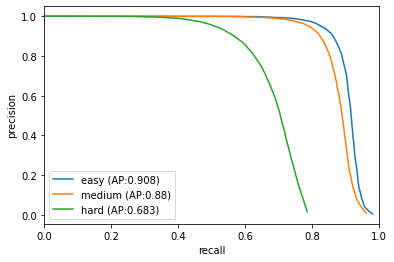

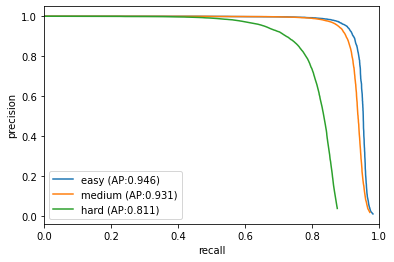

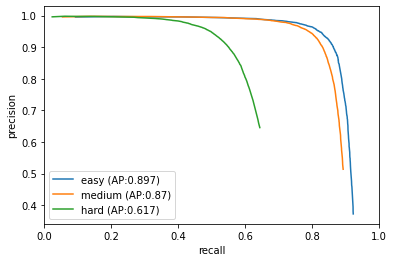

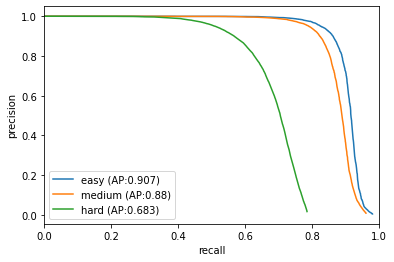

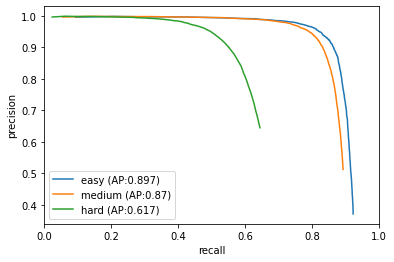

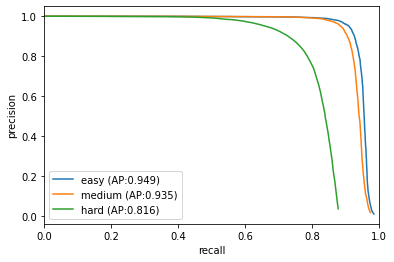

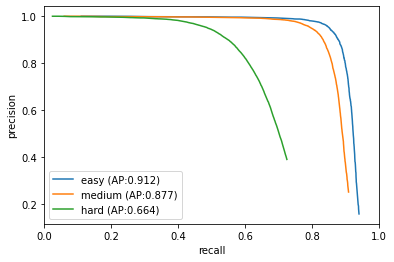

In [23]:
for pkl in os.listdir(pkl_base):
    if ".DS" in pkl: continue
    if "save_plot"==pkl: continue
    pkl_path = pkl_base+pkl
    save_path = pkl_base+"save_plot/{}_prcurve.jpg".format(pkl.split("result_WF_")[1].split(".pkl")[0])
    
    with open(pkl_path,'rb') as f:
        datas = pickle.load(f)
        
    data_easy = datas['easy']
    data_medium = datas['medium']
    data_hard = datas['hard']
    
    data_iter = {'easy':data_easy,'medium':data_medium,'hard':data_hard}
    
    fig = plt.figure()
    for dname in data_iter:
        data = data_iter[dname]
        recall = data['recall']
        precision = data['precision']
        thresh = data['thresh']
        ap = data['ap']

        mrec = np.concatenate(([0.], recall, [1.]))
        mpre = np.concatenate(([0.], precision, [0.]))

        for i in range(mpre.size - 1, 0, -1):
            mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])


        _ = plt.plot(recall,precision,label="{} (AP:{})".format(dname,round(ap,3)))
        plt.xlabel("recall")
        plt.ylabel("precision")
    plt.legend()
    #plt.savefig(save_path)

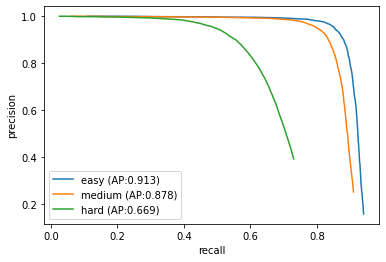

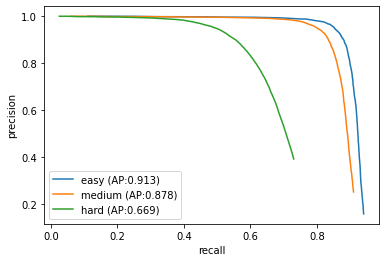

In [3]:
pkl_list = [
    "result_pkl_frvt/retinaface_frvt_op9.onnx.pkl",
    "result_pkl_frvt/retinaface_frvt_op11.onnx.pkl"
]
for pkl in pkl_list:
    pkl_path = pkl
    
    with open(pkl_path,'rb') as f:
        datas = pickle.load(f)
        
    data_easy = datas['easy']
    data_medium = datas['medium']
    data_hard = datas['hard']
    
    data_iter = {'easy':data_easy,'medium':data_medium,'hard':data_hard}
    
    fig = plt.figure()
    for dname in data_iter:
        data = data_iter[dname]
        recall = data['recall']
        precision = data['precision']
        thresh = data['thresh']
        ap = data['ap']

        mrec = np.concatenate(([0.], recall, [1.]))
        mpre = np.concatenate(([0.], precision, [0.]))

        for i in range(mpre.size - 1, 0, -1):
            mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])


        _ = plt.plot(recall,precision,label="{} (AP:{})".format(dname,round(ap,3)))
        plt.xlabel("recall")
        plt.ylabel("precision")
    plt.legend()